In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [460]:
# Read the data
cmdf = pd.read_csv('company.csv')

In [461]:
cmdf.shape

(148, 6)

In [462]:
cmdf.isna().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [463]:
#List of companies
list(cmdf['Company'].dropna().unique())

['TCS',
 'Infosys',
 'CTS',
 'Tata Consultancy Services',
 'Congnizant',
 'Infosys Pvt Lmt']

In [464]:
# Number of employees per company
emp_dist = cmdf['Company'].value_counts()

In [465]:
cmdf['Company'].value_counts().index

Index(['TCS', 'Infosys', 'CTS', 'Tata Consultancy Services', 'Congnizant',
       'Infosys Pvt Lmt'],
      dtype='object')

In [466]:
cmdf['Company'] = np.where(cmdf['Company']=='Tata Consultancy Services','TCS',cmdf['Company'])
cmdf['Company'] = np.where(cmdf['Company']=='Infosys Pvt Lmt','Infosys',cmdf['Company'])
cmdf['Company'] = np.where(cmdf['Company']=='Congnizant','CTS',cmdf['Company'])
cmdf['Company'] = cmdf['Company'].fillna('Anonymous')
cmdf['Place'] = cmdf['Place'].fillna('Anonymous')
cmdf['Gender'] = np.where(cmdf['Gender']==0,'Female','Male')

In [467]:
cmdf = cmdf.set_index('Company')

In [468]:
for c in cmdf.index.unique():
    cmdf['Salary'] = np.where((cmdf.index.values == c) & (cmdf['Salary'].isna()),round(cmdf.loc[c,'Salary'].mean(),2),cmdf['Salary'])

In [469]:
for c in cmdf.index.unique():
    cmdf['Age'] = np.where((cmdf.index.values == c) & (cmdf['Age'].isna()),round(cmdf.loc[c,'Age'].mean()),cmdf['Age'])

In [470]:
cmdf.isna().sum()

Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [471]:
cmdf.loc['TCS','Salary']

Company
TCS    5609.71
TCS    2300.00
TCS    4000.00
TCS    6000.00
TCS    8000.00
TCS    3000.00
TCS    5000.00
TCS    5609.71
TCS    3045.00
TCS    4824.00
TCS    7084.00
TCS    8345.00
TCS    5034.00
TCS    9024.00
TCS    5609.71
TCS    2300.00
TCS    4345.00
TCS    6000.00
TCS    8000.00
TCS    5000.00
TCS    6544.00
TCS    3045.00
TCS    4824.00
TCS    7084.00
TCS    8345.00
TCS    5034.00
TCS    9024.00
TCS    5609.71
TCS    2300.00
TCS    4000.00
TCS    6000.00
TCS    8000.00
TCS    3000.00
TCS    5000.00
TCS    5609.71
TCS    3045.00
TCS    4824.00
TCS    7084.00
TCS    8345.00
TCS    5034.00
TCS    9024.00
TCS    5609.71
TCS    2300.00
TCS    4324.00
TCS    5555.00
TCS    8787.00
TCS    5654.00
TCS    5009.00
TCS    3045.00
TCS    4824.00
TCS    7084.00
TCS    8345.00
TCS    5034.00
TCS    9024.00
TCS    5034.00
Name: Salary, dtype: float64

In [472]:
cmdf.loc['TCS','Salary'].mean()

5609.713818181818

In [473]:
cmdf = cmdf.reset_index('Company')

Text(0,0.5,'No of employees')

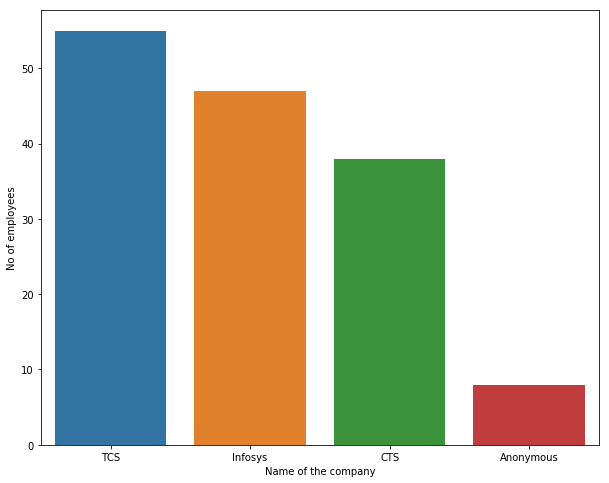

In [474]:
plt.figure(figsize = (10,8))
sns.barplot(x=cmdf['Company'].value_counts().index, y=cmdf['Company'].value_counts())
plt.xlabel('Name of the company')
plt.ylabel('No of employees')

In [475]:
#Max & Min employer
maxe = cmdf['Company'].value_counts().index[0]
mine = cmdf['Company'].value_counts().index[-1]
print('Maximum employed com :', maxe)
print('Minimum employed com :', mine)

Maximum employed com : TCS
Minimum employed com : Anonymous


In [476]:
cmdf['Place'].value_counts()

Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Anonymous     14
Cochin        13
Hyderabad      8
Noida          8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64

Text(0,0.5,'No of employees')

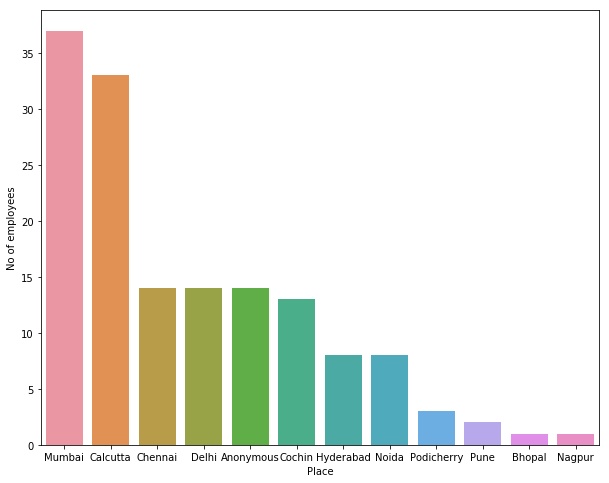

In [477]:
plt.figure(figsize = (10,8))
sns.barplot(x=cmdf['Place'].value_counts().index, y=cmdf['Place'].value_counts())
plt.xlabel('Place')
plt.ylabel('No of employees')

In [478]:
cmdf_place = pd.get_dummies(data = cmdf[['Company','Place']],columns = ['Place']).groupby(by='Company').sum()

In [479]:
cmdf_place

,Place_Anonymous,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
Company,,,,,,,,,,,,
Anonymous,1,0,2,1,0,1,1,1,0,1,0,0
CTS,3,0,7,3,4,2,3,10,0,2,2,2
Infosys,3,1,11,4,5,6,3,12,0,1,1,0
TCS,7,0,13,6,4,5,1,14,1,4,0,0


In [210]:
cmdf['Place'].dropna().unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Anonymous', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [480]:
cmdf_place

,Place_Anonymous,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
Company,,,,,,,,,,,,
Anonymous,1,0,2,1,0,1,1,1,0,1,0,0
CTS,3,0,7,3,4,2,3,10,0,2,2,2
Infosys,3,1,11,4,5,6,3,12,0,1,1,0
TCS,7,0,13,6,4,5,1,14,1,4,0,0


In [481]:
# Places of maximum & minumum employees in each company
print('Maximum Employess :\n',cmdf_place.idxmax(axis=1))
print('Minimum Employess :\n',cmdf_place.idxmin(axis=1))

Maximum Employess :
 Company
Anonymous    Place_Calcutta
CTS            Place_Mumbai
Infosys        Place_Mumbai
TCS            Place_Mumbai
dtype: object
Minimum Employess :
 Company
Anonymous    Place_Bhopal
CTS          Place_Bhopal
Infosys      Place_Nagpur
TCS          Place_Bhopal
dtype: object


In [482]:
#Mean salary of each company

cmdf_copy = cmdf.set_index('Company')

In [483]:
cmdf_copy.groupby(level=0).mean()

,Age,Salary
Company,,
Anonymous,27.250000,6176.600000
CTS,31.631579,4582.927105
Infosys,32.042553,5331.348936
TCS,28.709091,5609.713818


In [484]:
cmdf_copy[['Age','Salary']].groupby(level=0).describe()

Age                                                       Salary  \
          count       mean        std   min    25%   50%    75%   max  count   
Company                                                                        
Anonymous   8.0  27.250000   4.496030  22.0  24.75  26.0  28.50  35.0    8.0   
CTS        38.0  31.631579  12.572860   0.0  22.00  33.0  43.75  46.0   38.0   
Infosys    47.0  32.042553  11.650634   0.0  23.00  32.0  41.00  54.0   47.0   
TCS        55.0  28.709091   7.804730   0.0  23.00  32.0  34.00  38.0   55.0   

                                                                          \
                  mean          std     min      25%      50%        75%   
Company                                                                    
Anonymous  6176.600000  2169.381913  3000.0  5495.95  6176.60  7143.0000   
CTS        4582.927105  3055.143053  1089.0  2034.00  4582.93  6886.2325   
Infosys    5331.348936  2097.775363  3000.0  3184.00  5098.00  7000.0000   
TCS        5609.713818  1979.560913  2300.0  4584.50  5555.00  7084.0000   

                   
              max  
Company            
Anonymous  8943.0  
CTS        9876.0  
Infosys    8943.0  
TCS        9024.0

In [485]:
cmdf_copy[['Age','Salary']].groupby(level=0).describe()['Salary']['count']

Company
Anonymous     8.0
CTS          38.0
Infosys      47.0
TCS          55.0
Name: count, dtype: float64

In [486]:
cmdf['Gender'].value_counts()

Female    115
Male       33
Name: Gender, dtype: int64